In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import statistics as st
import sklearn as skl
from sklearn.model_selection import train_test_split

In [2]:
fil = pd.read_excel(r"Fouling_Brabrand.xlsx") #Endre fra CSV hvis ikke CSV
df = pd.DataFrame(fil)

pd.options.display.max_rows = 7000
pd.options.display.max_columns = 100


#droppe all ubrukelige/urelevante variabler

# dfNew = df.drop("variabel",axis=1)
dfNew = df.drop("Dato og Tid",axis=1)
#dfNew = dfNew.drop("variabel",axis=1)
#dfNew = dfNew.drop("variabel",axis=1)
#dfNew = dfNew.drop("variabeld",axis=1)

dfNew

TT30_Varmvandsbeholder(-C)  TT5_KemiVandsbeholder(-C)  \
0                          97.05                      18.05   
1                          93.67                      18.05   
2                          94.55                      18.06   
3                          95.88                      18.08   
4                          97.14                      18.10   
5                          98.13                      18.12   
6                          96.79                      18.12   
7                          97.01                      18.15   
8                          98.21                      18.15   
9                          96.91                      18.14   
10                         97.09                      17.78   
11                         98.33                      17.46   
12                         97.14                      17.38   
13                         97.10                      17.28   
14                         98.42                      17.19   
15                         97.35                      17.12   
16                         97.04                      17.07   
17                         97.31                      17.03   
18                         99.13                      17.01   
19                         99.06                      16.97   
20                         98.96                      16.94   
21                         98.88                      16.92   
22                         98.83                      16.91   
23                         98.76                      16.90   
24                         98.67                      16.88   
25                         98.60                      16.87   
26                         98.52                      16.87   
27                         98.44                      16.87   
28                         98.37                      16.87   
29                         98.29                      16.87   
30                         96.63                      16.87   
31                         94.88                      16.86   
32                         96.03                      16.85   
33                         97.28                      16.85   
34                         98.15                      16.86   
35                         96.73                      16.85   
36                         97.11                      16.85   
37                         98.23                      16.74   
38                         96.92                      16.59   
39                         97.26                      16.53   
40                         98.44                      16.45   
41                         97.14                      16.38   
42                         96.95                      16.27   
43                         98.36                      16.21   
44                         97.33                      16.17   
45                         97.14                      16.11   
46                         99.15                      16.08   
47                         99.04                      16.07   
48                         98.94                      16.04   
49                         98.87                      16.01   
50                         98.80                      16.00   
51                         98.74                      16.01   
52                         98.65                      16.01   
53                         98.59                      16.02   
54                         98.52                      16.00   
55                         98.44                      15.99   
56                         98.39                      16.02   
57                         98.33                      16.01   
58                         98.25                      16.00   
59                         98.20                      15.98   
60                         96.44                      15.97   
61                         94.77                      15.96   
62                         96.00     

In [21]:
#Droppe alle NaN
dfNew = dfNew.dropna(axis = 0, inplace = False, how = "any")
dfNew = dfNew[(df != 0).all(1)]
#Alternativt:
#Hvis ikke mange outliers: erstatt NaN med gjennomsnitt

#Alternativ 2
#fjerne outliers og bruk gjennomsnitt av resten for å erstatte NaN


In [22]:
dfNew = dfNew.reindex()
dfNew

TT30_Varmvandsbeholder(-C)  TT5_KemiVandsbeholder(-C)  \
0                          97.05                      18.05   
1                          93.67                      18.05   
2                          94.55                      18.06   
3                          95.88                      18.08   
4                          97.14                      18.10   
5                          98.13                      18.12   
6                          96.79                      18.12   
7                          97.01                      18.15   
8                          98.21                      18.15   
9                          96.91                      18.14   
10                         97.09                      17.78   
11                         98.33                      17.46   
12                         97.14                      17.38   
13                         97.10                      17.28   
14                         98.42                      17.19   
30                         96.63                      16.87   
31                         94.88                      16.86   
32                         96.03                      16.85   
33                         97.28                      16.85   
34                         98.15                      16.86   
35                         96.73                      16.85   
36                         97.11                      16.85   
37                         98.23                      16.74   
38                         96.92                      16.59   
39                         97.26                      16.53   
40                         98.44                      16.45   
41                         97.14                      16.38   
42                         96.95                      16.27   
43                         98.36                      16.21   
44                         97.33                      16.17   
60                         96.44                      15.97   
61                         94.77                      15.96   
62                         96.00                      15.95   
63                         97.14                      15.94   
64                         98.22                      15.92   
65                         96.86                      15.84   
66                         97.02                      15.68   
67                         98.29                      15.68   
68                         97.29                      15.65   
69                         97.04                      15.63   
70                         98.41                      15.62   
71                         97.35                      15.63   
72                         96.79                      15.63   
73                         98.28                      15.62   
74                         97.49                      15.63   
90                         96.41                      15.68   
91                         94.87                      15.66   
92                         96.00                      15.65   
93                         97.19                      15.66   
94                         98.19                      15.65   
95                         96.78                      15.62   
96                         97.03                      15.62   
97                         98.34                      15.61   
98                         97.41                      15.57   
99                         96.83                      15.57   
100                        98.27                      15.56   
101                        97.48                      15.57   
102                        96.69                      15.56   
103                        98.19                      15.54   
104                        97.78                      15.52   
120                        96.51                      15.60   
121                        94.81                      15.60   
122                        96.03     

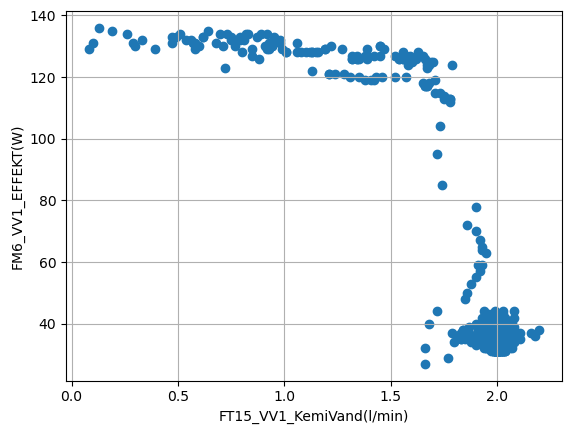

In [23]:
#Scatterplott for å se korrelasjon mellom to variabler

y = dfNew["FM6_VV1_EFFEKT(W)"]
x = dfNew["FT15_VV1_KemiVand(l/min)"]

plt.scatter(x,y)
plt.ylabel("FM6_VV1_EFFEKT(W)")
plt.xlabel("FT15_VV1_KemiVand(l/min)")
plt.grid()
plt.show()

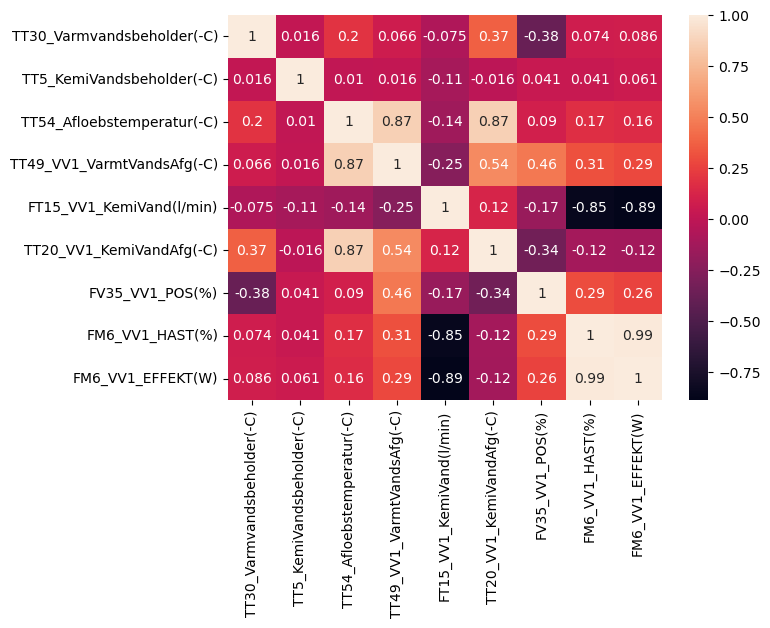

In [24]:
corr = dfNew.corr() # Regner ut korrelasjonskoeffisientene

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True) # Lager visualisering. Parameteren annot = True gir tallene i boksene.
plt.show()

In [25]:
len(dfNew.drop("FM6_VV1_EFFEKT(W)", axis=1))

1706

In [26]:
len(dfNew["FM6_VV1_EFFEKT(W)"])

1706

In [27]:
x_train, x_test, y_train, y_test = train_test_split(dfNew.drop("FM6_VV1_EFFEKT(W)", axis=1), dfNew["FM6_VV1_EFFEKT(W)"],  test_size=0.1, random_state=42, shuffle=True) #, stratify=dfNew["FM6_VV1_EFFEKT(W)"])
#Note: cannot use stratified split for FM6_VV1_EFFEKT(W) -- "there are some value in this column that is represented less than 1 time."

len(x_train)

1535

In [28]:
len(y_train)

1535

In [32]:
from sklearn import linear_model

print("Initiating")

logr = linear_model.LogisticRegression(max_iter = 99999)
logr.fit(x_train,y_train)

#For my own sanity
# if "FM6_VV1_EFFEKT(W)" in x_test:
#     x_test = x_test.drop("FM6_VV1_EFFEKT(W)",axis=1)
# else:
#     print("Done already \n")

# predList = []

# for i in range(len(x_test)):
#     predA = logr.predict([x_testA.iloc[i]])
#     predList.append(predA)

pred = logr.predict(x_test)


# for i in range(len(predList)):
#     predList[i] = int(predList[i])

# print(predList)
# print(" ")
# print(len(predList))
# print(" ")

# avg = np.mean(predList)
# print(avg)

print(pred)

Initiating
[ 33  34 128  37  33 126  33  33  35  44  33  33  33 126  34 132  38  33
  34  38  34  33  33 128 133  33 126  33  33  35  35  34  33  32  34  33
  34 126  34  33  33  38  33  37  33  33  35  34  32  35  37 128  32  37
  33  34  33  34  33  33  33 126  33  33  35  34  38  33 117  33  38  33
  32  37  35  37  34  38  34  34  37  33  37  34  33  34  33  39  34  34
  34  33  37  40  35  34  35  33  36  34  41  33  33  32  33  35 126  37
  33  33  33  38  33  33  33  33 131  37  38  34  38  39  33  34  33  39
 128 134  34  34  32  35  33  34  33  33  33  37  33  34  43  33  37  38
  33  34  33  38  38  33  33 132  32  33  34 121  35  33  33  33  34  33
  33  37  37  37  33  33  34  33  33]


C:\Users\muhmu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import statistics as stats

# avg = np.mean(dfNew['quality'])
# median = np.median(dfNew['quality'])
# typtall = stats.mode(dfNew['quality'])

# print("avg:",  avg)
# print("median:", median)
# print("typtall:", typtall)

# totalQ = []

# for q in dfNew["quality"]:
#     if q == 5:
#         totalQ.append(q)

# print(len(totalQ))

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(dfNew.drop("FM6_VV1_EFFEKT(W)", axis=1), dfNew["FM6_VV1_EFFEKT(W)"],  test_size=0.1, random_state=42, shuffle=True) #, stratify=dfNew["FM6_VV1_EFFEKT(W)"])

print("len x_test:",len(x_test))

#For my own sanity
if "FM6_VV1_EFFEKT(W)" in x_test:
    x_test = x_test.drop("FM6_VV1_EFFEKT(W)",axis=1)
else:
    print("Done already \n")

fil = pd.read_excel("Fouling_Brabrand.xlsx")
df = pd.DataFrame(fil)
pd.options.display.max_rows = 7000
pd.options.display.max_columns = 100

# X=df[["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide","density","sulphates", 'alcohol']].values
# y=df["quality"].values


pipe= Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
    ])
# print(pipe.get_params())
mod = GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors': [1,3,5,7]},cv=3,n_jobs=-1)

mod.fit(x_train,y_train)


pred=mod.predict(x_test)
print(pred)



len x_test: 171
Done already 



C:\Users\muhmu\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[ 33  34 129  37  36 124  31  33  35  35  33  32  33 119  33 132  35  32
  35  36  34  34  35 124 133  33 126  33  33  35  38  33  35  33  36  33
  32 126  34  34  34  33  35  34  32  34  36  35  34  34  35 131  32  37
  33  34  35  33  35  35  33 126  32  35  33  33  37  33 117  34  35  34
  32  37  40  32  34  37  33  34  33  33  34  38  34  34  33  38  33  34
  33  37  36  36  38  37  34  35  40  34  38  33  31  32  35  34 130  36
  37  33  33  36  31  34  32  34 131  34  34  34  37  39  33  38  34  38
 130 134  34  34  37  35  34  35  32  34  33  38  34  33  39  36  37  38
  32  33  34  34  35  35  37 131  33  34  38 121  34  32  32  33  36  33
  32  37  33  33  32  33  38  33  34]


<Figure size 5000x5000 with 0 Axes>

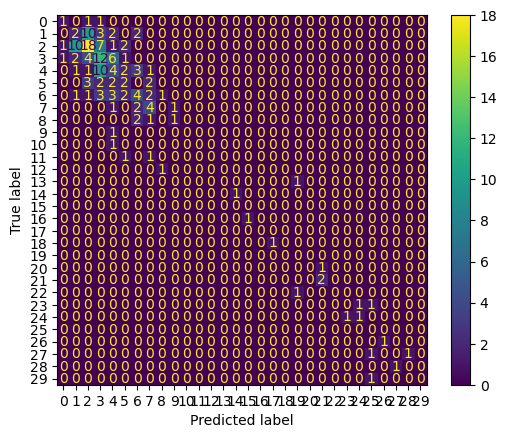

In [45]:
#Confusion matrix

import matplotlib.pyplot as plt
from sklearn import metrics


actual = y_test
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)# ,display_labels=["3","4","5","6","7","8","9"])

cm_display.plot()
plt.show()

In [ ]:
# print("modellen er",(0+4+152+189+62+9+0)/len(y_test)*100,"% riktig")

In [46]:
from sklearn.metrics import f1_score
#Accuracy test

f1a = f1_score(actual, pred, average='macro')
f1b = f1_score(actual, pred, average='micro')
f1c = f1_score(actual, pred, average='weighted')

print("accuracy for macro:",f1a)
print("accuracy for micro:",f1b)
print("accuracy for weighted:",f1c)

accuracy for macro: 0.18847978385004088
accuracy for micro: 0.30409356725146197
accuracy for weighted: 0.2914924593111799


In [47]:
#Kan tenke på å bruke AUC - ROC (til å sjekke hvor sikker modellen er på at den har rett)
print(min(y_test),max(y_test))
print(min(pred),max(pred))

31 136
31 134


In [ ]:
# plt.subplot(1, 2,1)
# plt.grid()
# print(plt.hist(pred, bins=[3, 4, 5, 6, 7, 8, 9, 10], edgecolor="Black"))
# plt.title("Pred")
# plt.subplot(1, 2,2)
# plt.title("Actual")
# plt.grid()
# print(plt.hist(y_test, bins=[3, 4, 5, 6, 7, 8, 9, 10], edgecolor="Black"))

In [ ]:
# import plotly.express as px
# # This dataframe has 244 lines, but 4 distinct values for `day`

# fig = px.pie(dfNew, names='quality',title="Actual quality values")
# # fig.update_traces(textinfo='value') #For å gjøre til values istedet for percentage
# fig.show()


# #Skrive i rapporten om refleksjoner om values vs percentages